# Uvod u znanost o podacima (UZOP) - Projekt - Prvi dio

Ovaj dio projekta rješavate uz skup podataka kojeg će vam poslati asistent kod kojeg ste se prijavili. Ova vježba nosi ukupno 10 bodova. U slučaju bilo kakvih pitanja ili nejasnoća javite se nadležnom asistentu.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

1. Učitajte danu CSV datoteku (climate_change_impact_on_agriculture_2024.csv) i prikažite prvih 8 redaka iz skupa podataka. (0,5 boda)

In [2]:
# KOD OVDJE
DATA_PATH = r"climate_change_impact_on_agriculture_2024.csv"
dataframe = pd.read_csv(DATA_PATH)
dataframe.head(8)

Entry  Year  Country            Region Crop_Type  Average_Temperature_C  \
0      1  1990   France     Ile-de-France    Coffee                  16.52   
1      2  1990   France         Grand Est  Soybeans                  15.23   
2      3  1990    India        Tamil Nadu  Soybeans                  24.43   
3      4  1990  Nigeria        North West    Barley                  -0.92   
4      5  1990   Russia      Northwestern    Coffee                  24.42   
5      6  1990  Nigeria        South West     Wheat                   8.29   
6      7  1990  Nigeria        North West    Fruits                  22.77   
7      8  1990   Canada  British Columbia      Corn                  30.65   

   Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
0                 2102.28             16.42                 2.448   
1                 1468.76              5.41                 3.120   
2                 1191.16              1.37                 1.300   
3                 1081.11             14.02                 2.430   
4                 1568.56             14.58                 2.260   
5                  375.62              8.82                 2.583   
6                 2193.41             22.21                 1.863   
7                 2817.06             19.89                 2.718   

   Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
0                       0                51.34                    44.54   
1                       5                62.01                     2.49   
2                       8                12.78                    34.80   
3                       5                17.30                    42.33   
4                       4                70.19                     8.76   
5                       3                37.91                    43.78   
6                       1                27.64                    34.07   
7                       8                29.12                     0.69   

   Fertilizer_Use_KG_per_HA  Soil_Health_Index    Adaptation_Strategies  \
0                     79.02              91.99            No Adaptation   
1                     27.56              76.44  Drought-resistant Crops   
2                     40.96              61.55          Organic Farming   
3                     68.93              41.63  Drought-resistant Crops   
4                     79.43              79.24  Drought-resistant Crops   
5                     81.46              32.78          Organic Farming   
6                       NaN              77.09          Organic Farming   
7                     90.03              59.37  Drought-resistant Crops   

   Economic_Impact_Million_USD Economic_Impact_Category  
0                       523.60                   Medium  
1                      1524.34                Very High  
2                       236.13                      Low  
3                       426.64                      Low  
4                       911.84                   Medium  
5                       931.57                   Medium  
6                       814.45                   Medium  
7                      1269.06                     High

2. Pronađite monotone i konstantne vrijednosti i uklonite ih. (1 bod)

In [3]:
# KOD OVDJE
dataframe.describe()

Entry          Year  Average_Temperature_C  \
count  10000.00000  10000.000000           10000.000000   
mean    5000.50000   2007.088700              15.241299   
std     2886.89568     10.084245              11.466955   
min        1.00000   1990.000000              -4.990000   
25%     2500.75000   1999.000000               5.430000   
50%     5000.50000   2007.000000              15.175000   
75%     7500.25000   2016.000000              25.340000   
max    10000.00000   2024.000000              35.000000   

       Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
count             9200.000000       9000.000000          10000.000000   
mean              1610.371943         15.283988              2.240017   
std                807.398821          8.611065              0.998342   
min                200.150000          0.500000              0.450000   
25%                920.217500          7.750000              1.449000   
50%               1607.050000         15.260000              2.170000   
75%               2311.207500         22.870000              2.930000   
max               2999.670000         30.000000              5.000000   

       Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
count            10000.000000         10000.000000             10000.000000   
mean                 4.980900            55.248332                24.955735   
std                  3.165808            25.988305                14.490962   
min                  0.000000            10.010000                 0.000000   
25%                  2.000000            32.677500                12.527500   
50%                  5.000000            55.175000                24.930000   
75%                  8.000000            77.582500                37.470000   
max                 10.000000            99.990000                49.990000   

       Fertilizer_Use_KG_per_HA  Soil_Health_Index  \
count               8800.000000       10000.000000   
mean                  50.267039          64.901278   
std                   28.689363          20.195882   
min                    0.010000          30.000000   
25%                   25.807500          47.235000   
50%                   49.990000          64.650000   
75%                   75.072500          82.472500   
max                   99.990000         100.000000   

       Economic_Impact_Million_USD  
count                 10000.000000  
mean                    674.269658  
std                     414.591431  
min                      47.840000  
25%                     350.545000  
50%                     583.920000  
75%                     917.505000  
max                    2346.470000

In [4]:
print(dataframe.nunique()) 
#Na temelju dobivenog izlaza, čini se da bi svakako trebalo ukloniti stupac Entry, budući da on samo monotono raste.
#Budući da imamo još neke sumnjive varijable za monotoni rast, koristit ćemo dodatnu provjeru
dataframe.drop(("Entry"), axis=1, inplace=True, errors="ignore")

monotonic_columns = []
for column in dataframe.columns:
    #print(column)
    if dataframe[column].is_monotonic_increasing or dataframe[column].is_monotonic_decreasing:
        monotonic_columns.append(column)

print(f"Stupci koji monotono rastu ili padaju: {monotonic_columns}")
#Iako stupac Year monotono raste, vjerojatno bi bilo korisno zadržati ga.
#Konstantne vrijednosti ne postoje, budući da nijedan stupac nema nunique 1.

Entry                          10000
Year                              35
Country                           10
Region                            34
Crop_Type                         10
Average_Temperature_C           3677
Total_Precipitation_mm          9016
CO2_Emissions_MT                2818
Crop_Yield_MT_per_HA             850
Extreme_Weather_Events            11
Irrigation_Access_%             6003
Pesticide_Use_KG_per_HA         4343
Fertilizer_Use_KG_per_HA        5880
Soil_Health_Index               5318
Adaptation_Strategies              5
Economic_Impact_Million_USD     9631
Economic_Impact_Category           5
dtype: int64
Stupci koji monotono rastu ili padaju: ['Year']


3. Pronađite nedostajuće vrijednosti. Provedite zamjenu/uklanjanje nedostajućih vrijednosti odgovarajućim postupkom. Objasnite zašto ste primjenili odabrane postupke. (2 boda)

In [5]:
# KOD OVDJE
print(dataframe.isna().sum())
#Vidimo da postoje samo 3 stupca koji sadrže nedostajuće vrijednosti: Total_Precipitation_mm, CO2_Emissions_MT, Fertilizer_Use_KG_per_HA. 
#Također, u nijednom stupcu broj nedostajućih vrijednosti nije veći od 12%.
#Kako bismo odredili odgovarajući postupak zamjene nedostajućih podataka, proučimo svaki od 3 stupca. Međutim, prije toga odbacujemo mogućnost izbacivanja
#bilo kojeg od 3 navedena stupca, zato što, iako je relativno malen postotak primjera s nedostajućim vrijednostima (8-12%), to je i dalje značajno.

Year                              0
Country                           0
Region                            0
Crop_Type                         0
Average_Temperature_C             0
Total_Precipitation_mm          800
CO2_Emissions_MT               1000
Crop_Yield_MT_per_HA              0
Extreme_Weather_Events            0
Irrigation_Access_%               0
Pesticide_Use_KG_per_HA           0
Fertilizer_Use_KG_per_HA       1200
Soil_Health_Index                 0
Adaptation_Strategies             0
Economic_Impact_Million_USD       0
Economic_Impact_Category          0
dtype: int64


                         Country_Region  total_entries  missing_entries
0                 Argentina - Northeast            264               25
1                 Argentina - Northwest            247               20
2                    Argentina - Pampas            224               20
3                 Argentina - Patagonia            249               20
4           Australia - New South Wales            276               17
5                Australia - Queensland            253               21
6                  Australia - Victoria            283               12
7         Australia - Western Australia            220               18
8                        Brazil - North            270               16
9                    Brazil - Northeast            229               23
10                       Brazil - South            226               31
11                   Brazil - Southeast            219               15
12            Canada - British Columbia            242          

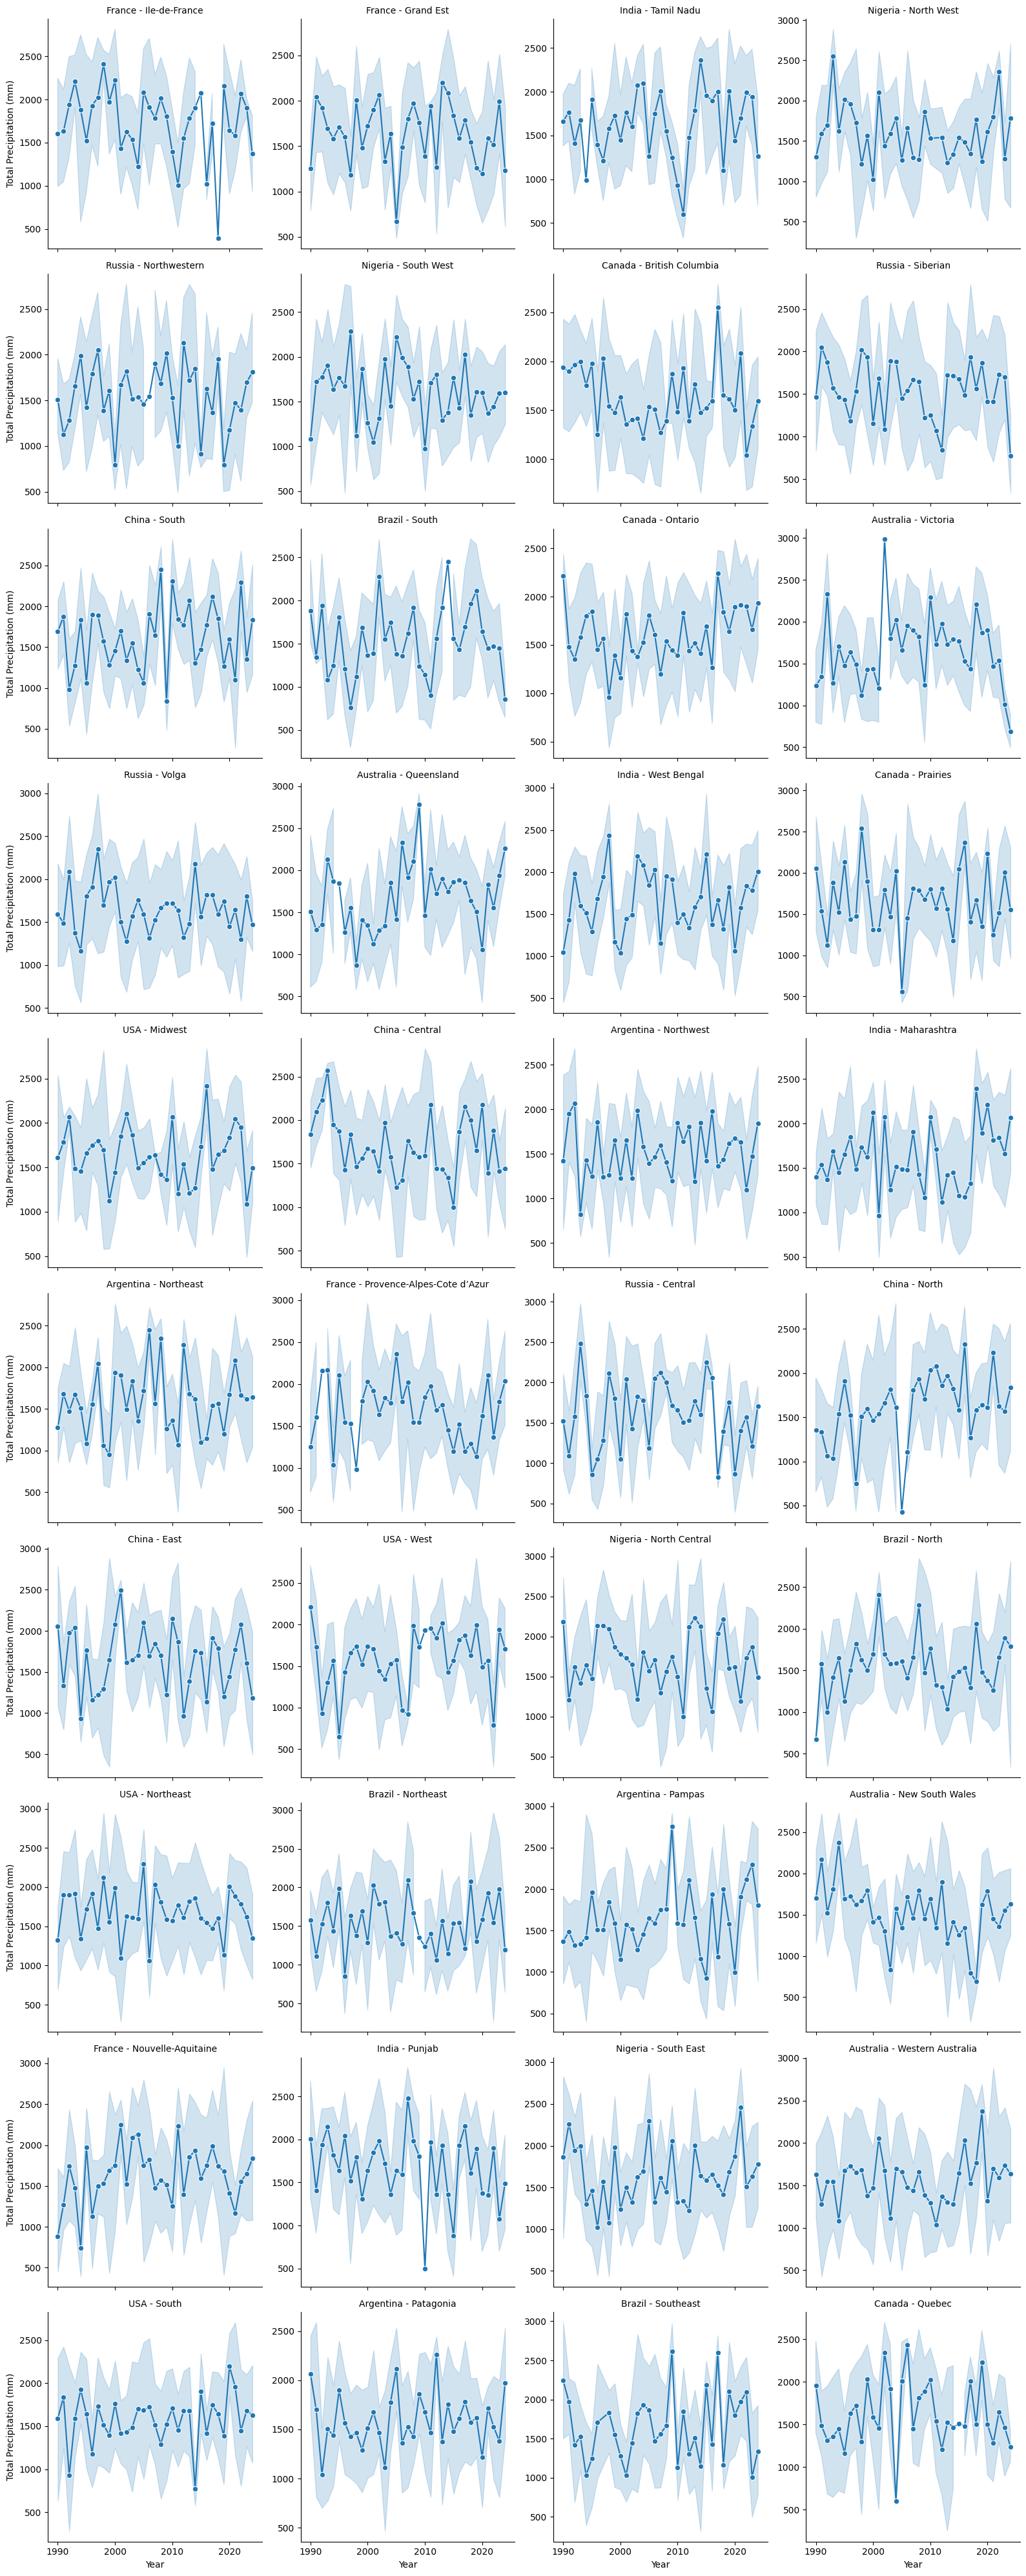

In [6]:
#Analiza stupca Total_Precipitation_mm
#Stupac sadrži numeričke vrijednost
#Prvo pogledajmo koliko je nedostajućih vrijednosti za svaku kombinaciju država + regija
tmp_dataframe = dataframe.copy()
tmp_dataframe["Country_Region"] = dataframe["Country"] + ' - ' + dataframe["Region"]
total_counts_by_cr = tmp_dataframe.groupby("Country_Region").size().reset_index(name="total_entries")
missing_counts_by_cr = tmp_dataframe.groupby("Country_Region")["Total_Precipitation_mm"].apply(lambda x: x.isna().sum()).reset_index(name="missing_entries")
mt_by_cr = pd.merge(total_counts_by_cr, missing_counts_by_cr, on="Country_Region")
print(mt_by_cr) 

grid_cr_tp = sns.FacetGrid(tmp_dataframe, col="Country_Region", col_wrap=4, height=4, sharey=False)
grid_cr_tp.map(sns.lineplot, "Year", "Total_Precipitation_mm", marker='o')
grid_cr_tp.set_titles("{col_name}")
grid_cr_tp.set_axis_labels("Year", "Total Precipitation (mm)")
plt.tight_layout()
plt.show() 
#Čini se da ni za jednu kombinaciju Country - Region ne nedostaje više od 15% vrijednosti, što je dobro, budući da to znači da ne postoji grupa
#za koju bismo trebali ukloniti sve podatke, nego možemo koristiti neki aproksimativni postupak. Mogli bismo uzeti srednju vrijednost, te nju staviti na 
#mjesto nedostajućih vrijednosti, ili recimo zadnju poznatu vrijednost. Međutim, koristiti ćemo malo kompleksniji postupak (npr. MA - moving average), 
#budući da se proces čini stohastičkim, nemamo velike prekide između poznatih vrijednosti te možemo primijetiti sezonalnost (rast pa pad) na svim grafovima.

def fill_missing_with_ma(values, window):
    ma_series = values.rolling(window=window, min_periods=1, center=True).mean()
    filled_values = values.copy()
    filled_values[values.isna()] = ma_series[values.isna()]
    return filled_values

#Napravimo sada popunjavanje nad originalnim skupom podataka
#Za veličinu prozora postavimo broj 5, odnosno raspon od 5 godina.
dataframe = dataframe.reset_index(drop=True)
dataframe["Total_Precipitation_mm"] = dataframe.groupby(["Country", "Region"])["Total_Precipitation_mm"].apply(lambda x: fill_missing_with_ma(x, 5)).reset_index(level=[0,1], drop=True)
#print(dataframe.isna().sum())

                         Country_Region  total_entries  missing_entries
0                 Argentina - Northeast            264               32
1                 Argentina - Northwest            247               30
2                    Argentina - Pampas            224               24
3                 Argentina - Patagonia            249               27
4           Australia - New South Wales            276               28
5                Australia - Queensland            253               30
6                  Australia - Victoria            283               27
7         Australia - Western Australia            220               24
8                        Brazil - North            270               35
9                    Brazil - Northeast            229               19
10                       Brazil - South            226               25
11                   Brazil - Southeast            219               21
12            Canada - British Columbia            242          

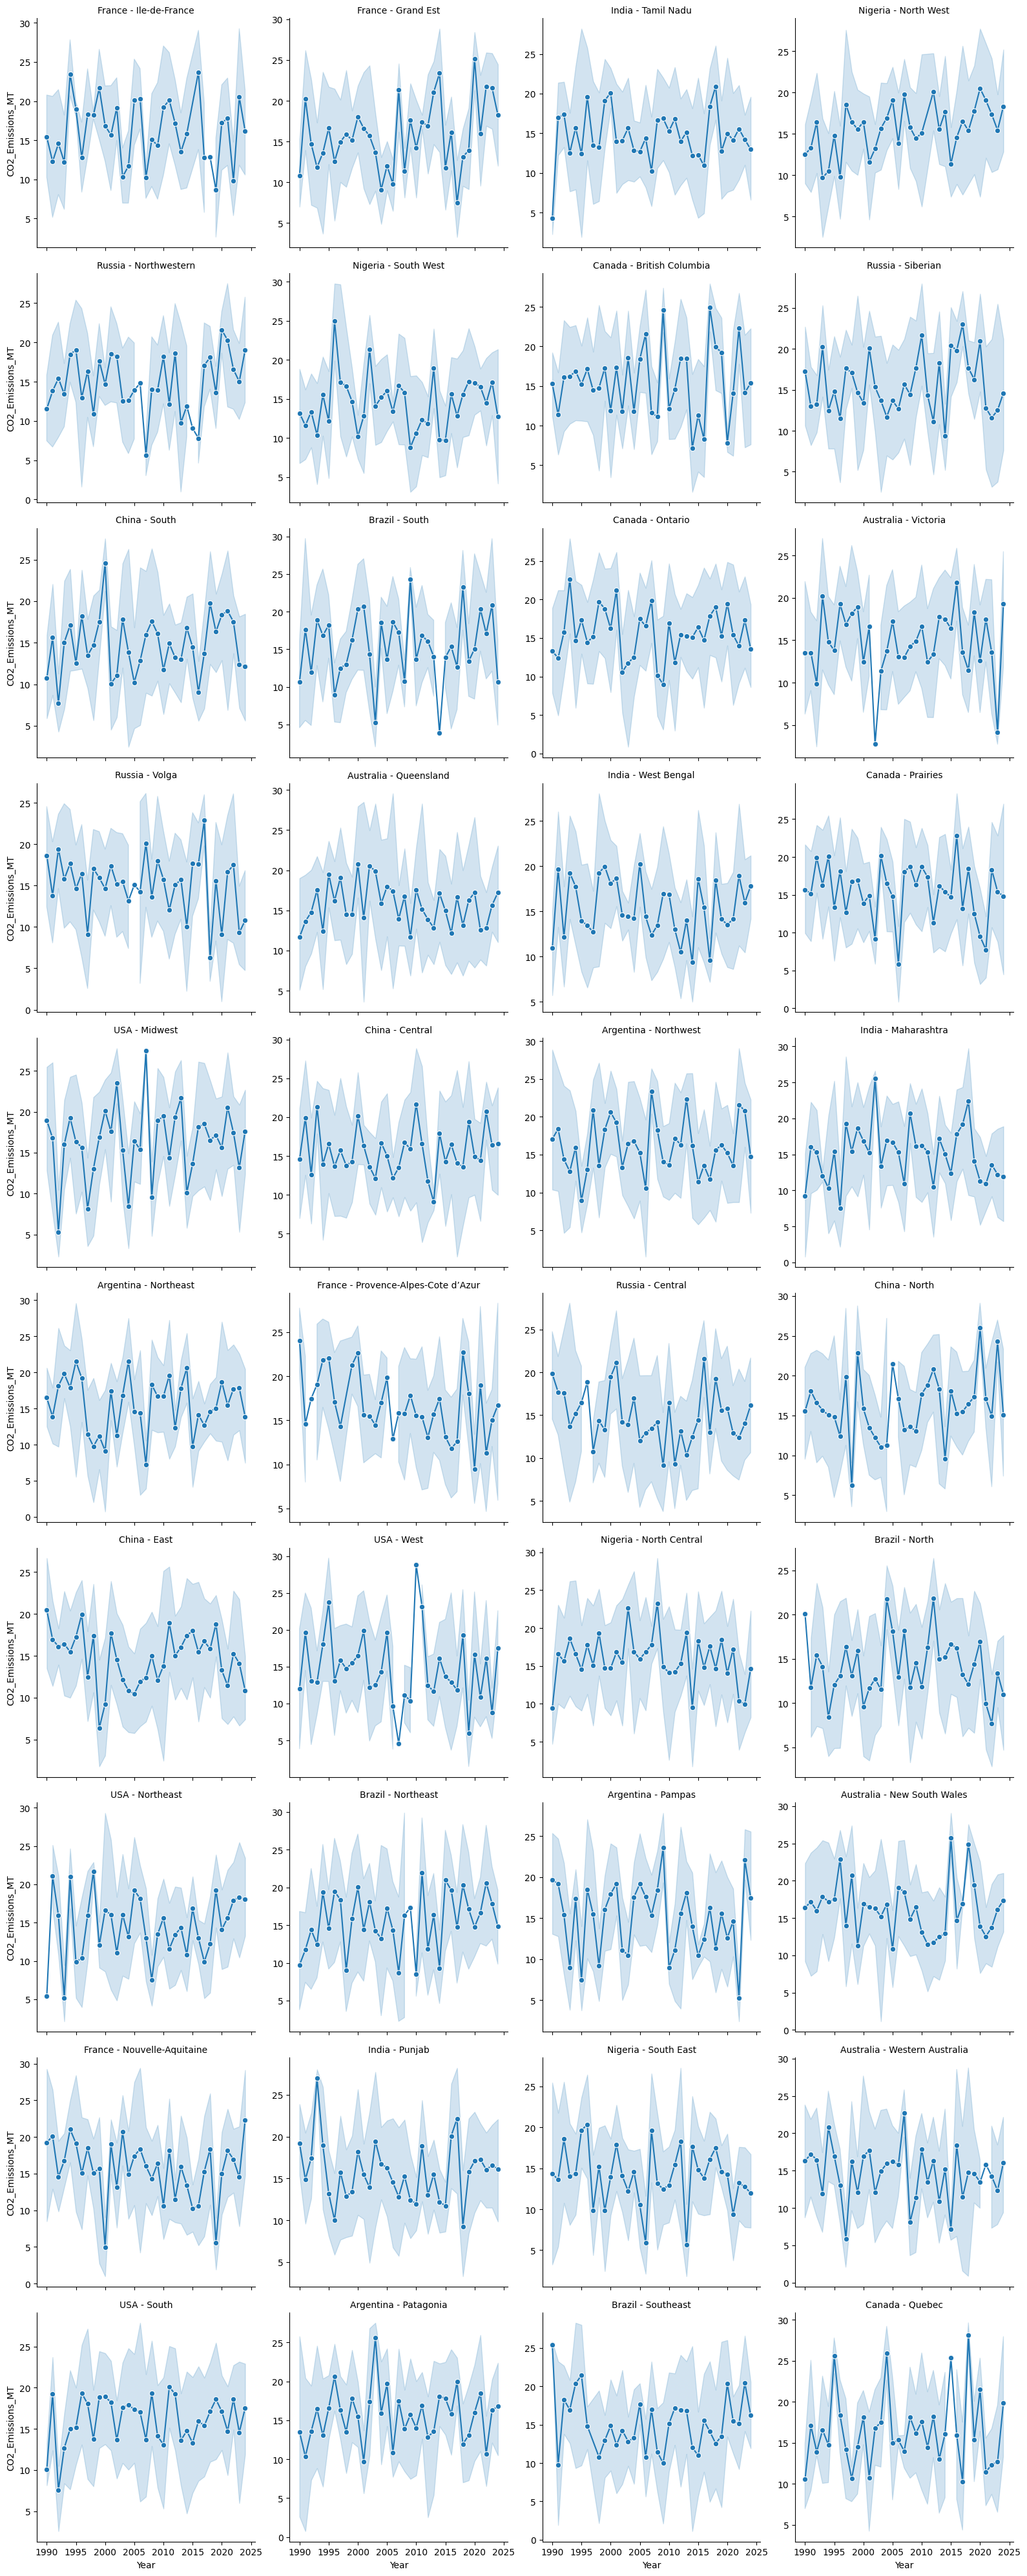

In [7]:
#Analiza stupca CO2_Emissions_MT
#Stupac sadrži numeričke vrijednosti
#Prvo pogledajmo koliko je nedostajućih vrijednosti za svaku kombinaciju država + regija, a zatim vizualizirajmo kretanje značajke kroz vrijeme
tmp_dataframe = dataframe.copy()
tmp_dataframe["Country_Region"] = dataframe["Country"] + " - " + dataframe["Region"]
total_counts_by_cr = tmp_dataframe.groupby("Country_Region").size().reset_index(name="total_entries")
missing_counts_by_cr = tmp_dataframe.groupby("Country_Region")["CO2_Emissions_MT"].apply(lambda x: x.isna().sum()).reset_index(name="missing_entries")
mt_by_cr = pd.merge(total_counts_by_cr, missing_counts_by_cr, on="Country_Region")
print(mt_by_cr) 

grid_cr_tp = sns.FacetGrid(tmp_dataframe, col="Country_Region", col_wrap=4, height=4, sharey=False)
grid_cr_tp.map(sns.lineplot, "Year", "CO2_Emissions_MT", marker="o")
grid_cr_tp.set_titles("{col_name}")
grid_cr_tp.set_axis_labels("Year", "CO2_Emissions_MT")
plt.tight_layout()
plt.show()

#Ponovno uočavamo da nema puno nedostajućih vrijednosti, relativno u odnosu na ukupan broj primjera. Također, na temelju grafova možemo donijeti 
#zaključak da se isplati koristiti isti postupak zamjene nedostajućih vrijednosti kao i za Total_Precipitation_mm
dataframe = dataframe.reset_index(drop=True)
dataframe["CO2_Emissions_MT"] = dataframe.groupby(["Country", "Region"])["CO2_Emissions_MT"].apply(lambda x: fill_missing_with_ma(x, 5)).reset_index(level=[0,1], drop=True)

                         Country_Region  total_entries  missing_entries
0                 Argentina - Northeast            264               28
1                 Argentina - Northwest            247               32
2                    Argentina - Pampas            224               31
3                 Argentina - Patagonia            249               32
4           Australia - New South Wales            276               41
5                Australia - Queensland            253               35
6                  Australia - Victoria            283               29
7         Australia - Western Australia            220               23
8                        Brazil - North            270               36
9                    Brazil - Northeast            229               24
10                       Brazil - South            226               20
11                   Brazil - Southeast            219               22
12            Canada - British Columbia            242          

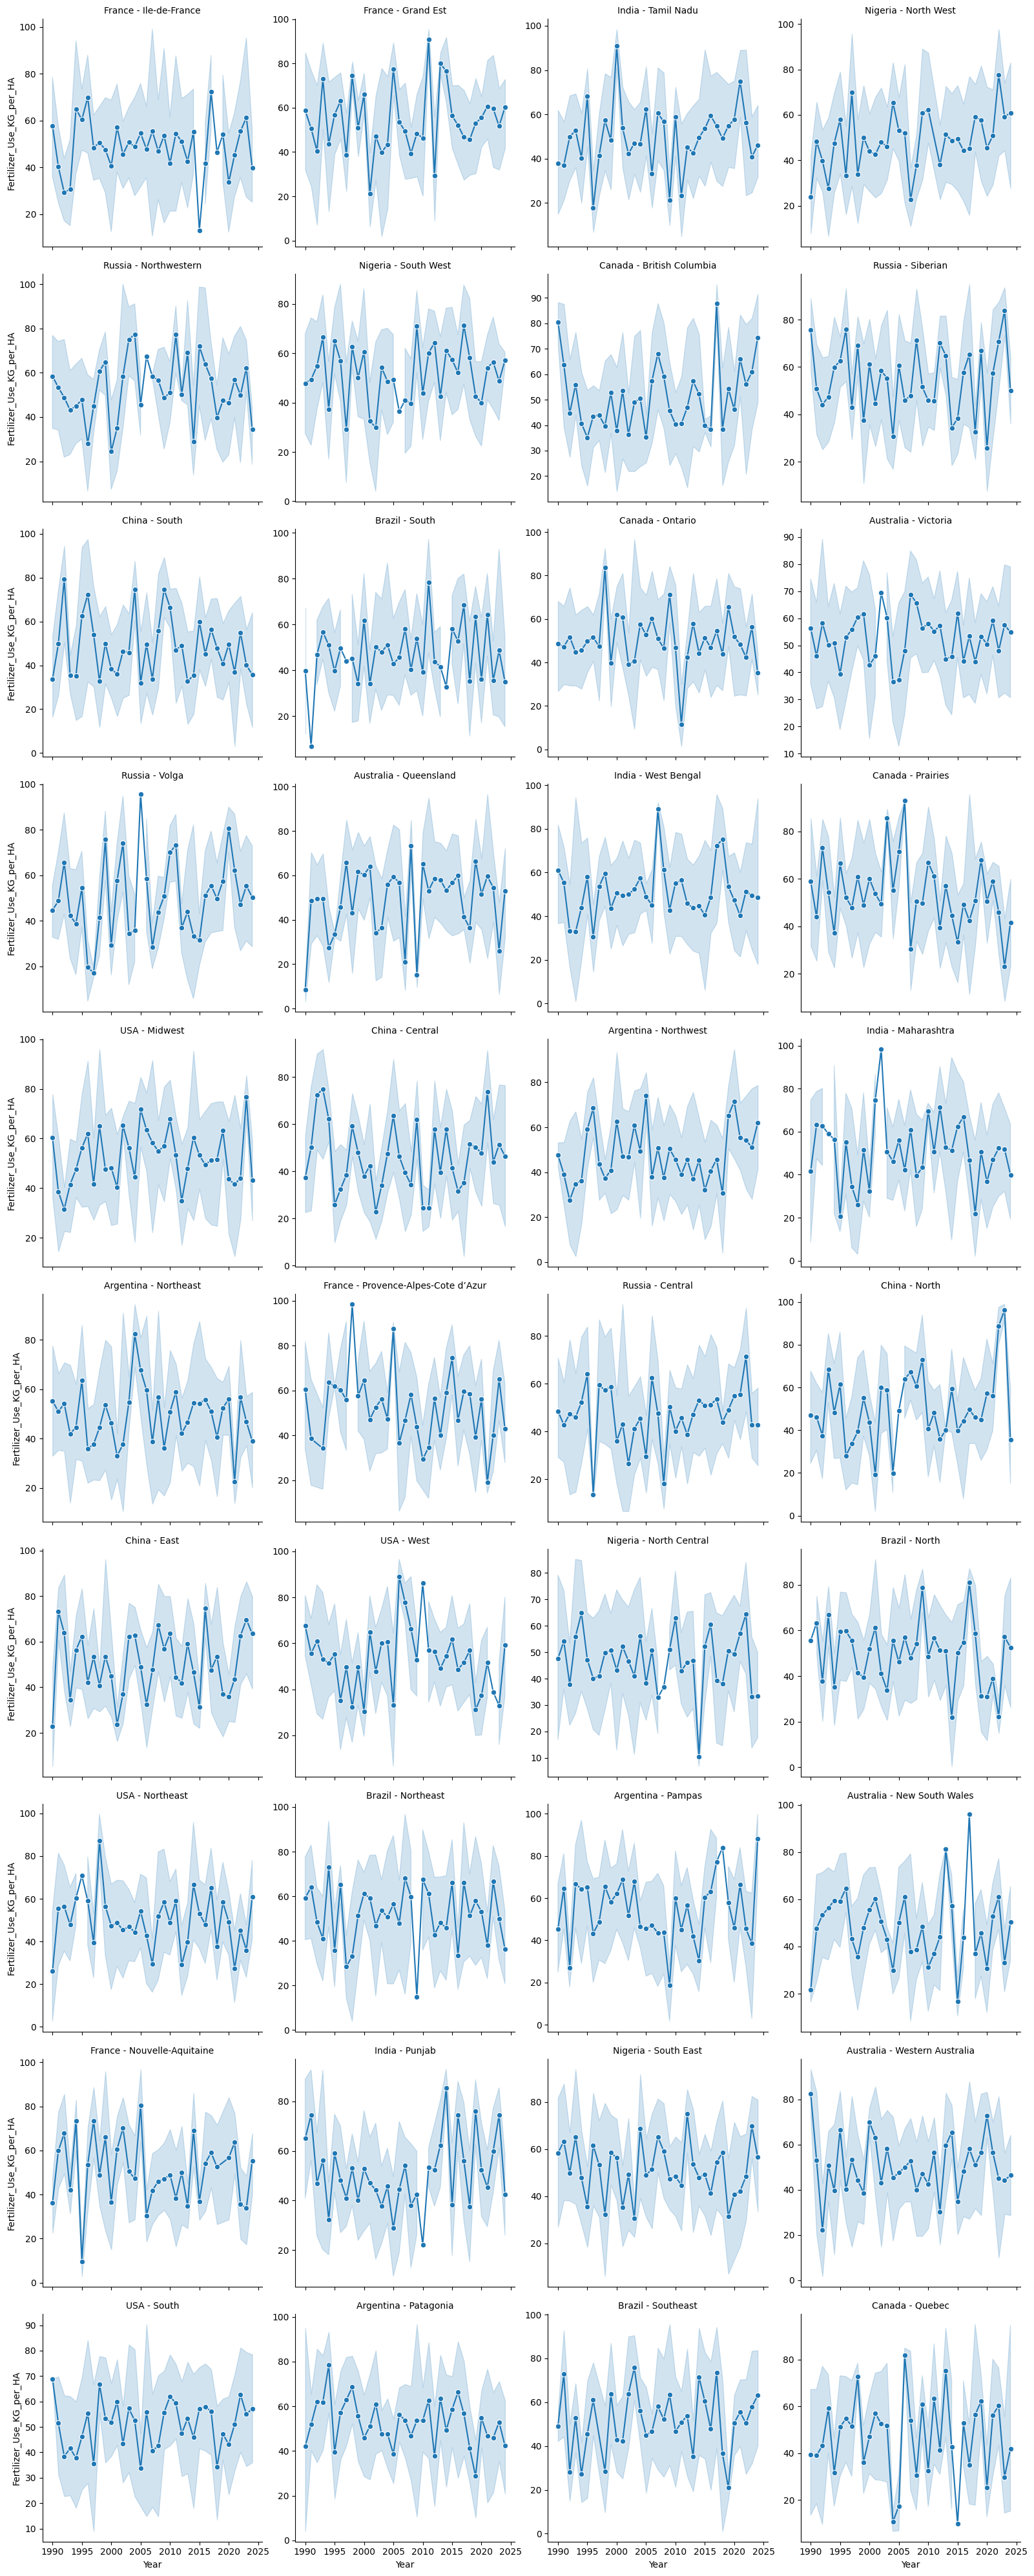

Year                           0
Country                        0
Region                         0
Crop_Type                      0
Average_Temperature_C          0
Total_Precipitation_mm         0
CO2_Emissions_MT               0
Crop_Yield_MT_per_HA           0
Extreme_Weather_Events         0
Irrigation_Access_%            0
Pesticide_Use_KG_per_HA        0
Fertilizer_Use_KG_per_HA       0
Soil_Health_Index              0
Adaptation_Strategies          0
Economic_Impact_Million_USD    0
Economic_Impact_Category       0
dtype: int64


In [8]:
#Analiza Fertilizer_Use_KG_per_HA
#Stupac sadrži numeričke vrijednosti
#Ponovno koristimo isti postupak kao u prethodna dva slučaja
tmp_dataframe = dataframe.copy()
tmp_dataframe["Country_Region"] = dataframe["Country"] + " - " + dataframe["Region"]
total_counts_by_cr = tmp_dataframe.groupby("Country_Region").size().reset_index(name="total_entries")
missing_counts_by_cr = tmp_dataframe.groupby("Country_Region")["Fertilizer_Use_KG_per_HA"].apply(lambda x: x.isna().sum()).reset_index(name="missing_entries")
mt_by_cr = pd.merge(total_counts_by_cr, missing_counts_by_cr, on="Country_Region")
print(mt_by_cr) 

grid_cr_tp = sns.FacetGrid(tmp_dataframe, col="Country_Region", col_wrap=4, height=4, sharey=False)
grid_cr_tp.map(sns.lineplot, "Year", "Fertilizer_Use_KG_per_HA", marker="o")
grid_cr_tp.set_titles("{col_name}")
grid_cr_tp.set_axis_labels("Year", "Fertilizer_Use_KG_per_HA")
plt.tight_layout()
plt.show()

#Ponovno primjećujemo da udio nedostajućih vrijednosti nije viši od 15% niti za jednu kombinaciju država + regija, te da postoji sezonalnost (rast pa pad)
#na grafovima koji prikazuju kretanje značajke kroz vrijeme. Ponovno ćemo koristiti MA za popunjavanje nedostajućih vrijednosti.
dataframe = dataframe.reset_index(drop=True)
dataframe["Fertilizer_Use_KG_per_HA"] = dataframe.groupby(["Country", "Region"])["Fertilizer_Use_KG_per_HA"].apply(lambda x: fill_missing_with_ma(x, 5)).reset_index(level=[0,1], drop=True)
print(dataframe.isna().sum())

4. Transformirajte kategoričke značajke (za koje ima smisla) u numeričke koristeći smisleni postupak. (1 bod)

In [9]:
# KOD OVDJE
#Prvo identificirajmo kategoričke značajke
print(dataframe.dtypes)
#Vidimo da stupci Country, Region, Crop_Type, Adaptation_Strategies i Economic_Impact_Category su kandidati za pretvorbu u numeričke značajke, ali
#provedimo prvo analizu svake od njih
print(f"Countries: {dataframe["Country"].unique()}")
print(f"Regions: {dataframe["Region"].unique()}")
print(f"Types of crop: {dataframe["Crop_Type"].unique()}")
print(f"Adaptation strategies: {dataframe["Adaptation_Strategies"].unique()}")
print(f"Economic impact Categories: {dataframe["Economic_Impact_Category"].unique()}")
#Ono što je odmah očito je da stupac Economic_Impact_Category možemo kodirati koristeći label encoding, budući da postoji poredak, odnosno gradacija
#mogućih vrijednosti.
#Izvorne stupce ćemo ostaviti, ali bismo ih svakako uklonili ako bismo koristili neku metodu strojnog učenja ili obrade koja zahtijeva kvantitativnu 
#analizu.
econ_imp_enc = {
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Very High': 4,
    'Extreme': 5
}
dataframe['Economic_Impact_Category_Encoded'] = dataframe['Economic_Impact_Category'].map(econ_imp_enc)

#Ostale značajke nikako nema smisla kodirati koristeći Label Encoding, zato što nemamo jasan način usporedbe (kako npr. uspoređivati države, ili tipove 
#žitarica?). Crop_Type i Adaptation_Strategies ima smisla transformirati koristeći one-hot encoding, budući da nemaju puno različitih vrijednosti.
#S obzirom na veliki broj mogućih vrijednosti za kategorije Country i Region, njihova transformacija u nemirčke značajke koristeći 
#one-hot encoding, budući da bismo time značajno povećali dimenzionalnost podataka (10 novih stupaca za Country, 34 za Region). Transformaciju bi proveo
#tek nakon eventualnih drugih koraka u obradi podataka (konkretno, spojio bi ta 2 stupca u jedan, budući da su oni često usko vezani, npr. 
#France za Country 	i Ile-de-France za Region). Te nakon toga proveo one-hot encoding. Međutim, čak i tada bismo možda previše povećali dimenzionalnost
#podataka, te se doveli u probleme zbog tzv. "prokletstva dimenzionalnosti", budući da imamo samo 10000 primjera u podatkovnom skupu.
crop_type_encoder = OneHotEncoder(handle_unknown="ignore")
encoded_crop_type = crop_type_encoder.fit_transform(dataframe[["Crop_Type"]]).toarray()
tmp_dataframe = pd.DataFrame(encoded_crop_type, columns=crop_type_encoder.get_feature_names_out(["Crop_Type"]))
dataframe = pd.concat([dataframe, tmp_dataframe], axis=1)

crop_type_encoder = OneHotEncoder(handle_unknown="ignore")
encoded_crop_type = crop_type_encoder.fit_transform(dataframe[["Adaptation_Strategies"]]).toarray()
tmp_dataframe = pd.DataFrame(encoded_crop_type, columns=crop_type_encoder.get_feature_names_out(["Adaptation_Strategies"]))
dataframe = pd.concat([dataframe, tmp_dataframe], axis=1)
dataframe.head(8)
#print(dataframe.columns)
#Zasada ćemo ostaviti kategoričke značajke i njima ekvivalentne numeričke, budući da su nam kategoričke prikladnije za vizualizaciju nekih podataka
#npr. dosta je nepregledno vizualizirati Crop_Type preko numeričkih značajki, u odnosu na kategoričku. Micanje odgovarajućih kategoričkih značajki iz 
#podatkovnog okvira ćemo provesti na kraju.

Year                             int64
Country                         object
Region                          object
Crop_Type                       object
Average_Temperature_C          float64
Total_Precipitation_mm         float64
CO2_Emissions_MT               float64
Crop_Yield_MT_per_HA           float64
Extreme_Weather_Events           int64
Irrigation_Access_%            float64
Pesticide_Use_KG_per_HA        float64
Fertilizer_Use_KG_per_HA       float64
Soil_Health_Index              float64
Adaptation_Strategies           object
Economic_Impact_Million_USD    float64
Economic_Impact_Category        object
dtype: object
Countries: ['France' 'India' 'Nigeria' 'Russia' 'Canada' 'China' 'Brazil' 'Australia'
 'USA' 'Argentina']
Regions: ['Ile-de-France' 'Grand Est' 'Tamil Nadu' 'North West' 'Northwestern'
 'South West' 'British Columbia' 'Siberian' 'South' 'Ontario' 'Victoria'
 'Volga' 'Queensland' 'West Bengal' 'Prairies' 'Midwest' 'Central'
 'Northwest' 'Maharashtra' 'Northeast

Year  Country            Region Crop_Type  Average_Temperature_C  \
0  1990   France     Ile-de-France    Coffee                  16.52   
1  1990   France         Grand Est  Soybeans                  15.23   
2  1990    India        Tamil Nadu  Soybeans                  24.43   
3  1990  Nigeria        North West    Barley                  -0.92   
4  1990   Russia      Northwestern    Coffee                  24.42   
5  1990  Nigeria        South West     Wheat                   8.29   
6  1990  Nigeria        North West    Fruits                  22.77   
7  1990   Canada  British Columbia      Corn                  30.65   

   Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
0                 2102.28             16.42                 2.448   
1                 1468.76              5.41                 3.120   
2                 1191.16              1.37                 1.300   
3                 1081.11             14.02                 2.430   
4                 1568.56             14.58                 2.260   
5                  375.62              8.82                 2.583   
6                 2193.41             22.21                 1.863   
7                 2817.06             19.89                 2.718   

   Extreme_Weather_Events  Irrigation_Access_%  ...  Crop_Type_Rice  \
0                       0                51.34  ...             0.0   
1                       5                62.01  ...             0.0   
2                       8                12.78  ...             0.0   
3                       5                17.30  ...             0.0   
4                       4                70.19  ...             0.0   
5                       3                37.91  ...             0.0   
6                       1                27.64  ...             0.0   
7                       8                29.12  ...             0.0   

   Crop_Type_Soybeans  Crop_Type_Sugarcane Crop_Type_Vegetables  \
0                 0.0                  0.0                  0.0   
1                 1.0                  0.0                  0.0   
2                 1.0                  0.0                  0.0   
3                 0.0                  0.0                  0.0   
4                 0.0                  0.0                  0.0   
5                 0.0                  0.0                  0.0   
6                 0.0                  0.0                  0.0   
7                 0.0                  0.0                  0.0   

   Crop_Type_Wheat Adaptation_Strategies_Crop Rotation  \
0              0.0                                 0.0   
1              0.0                                 0.0   
2              0.0                                 0.0   
3              0.0                                 0.0   
4              0.0                                 0.0   
5              1.0                                 0.0   
6              0.0                                 0.0   
7              0.0                                 0.0   

   Adaptation_Strategies_Drought-resistant Crops  \
0                                            0.0   
1                                            1.0   
2                                            0.0   
3                                            1.0   
4                                            1.0   
5                                            0.0   
6                                            0.0   
7                                            1.0   

   Adaptation_Strategies_No Adaptation  Adaptation_Strategies_Organic Farming  \
0                                  1.0                                    0.0   
1                                  0.0                                    0.0   
2                                  0.0                                    1.0   
3                                  0.0                                    0.0   
4                                  0.0                                    0.0   
5                  

5. Za numeričke značajke prikažite srednju (mean), centralnu (median), minimalnu i maksimalnu vrijednost. Za kategoričke značajke ispišite učestalost pojavljivanja svake vrijednosti. (1,5 boda)

In [10]:
# KOD OVDJE
#Za varijable koje su transformirane koristeći one-hot ili label encoding nema smisla da se prikazuju ovdje, pošto znamo njihov min i max value, 
#a medijalna i srednja vrijednost nam ne govore puno, ali su ipak izračunate  i prikazane  tražene vrijednosti  i za njih, budući da su numeričke 
#vrijednosti.
numerical_columns = ["Year", "Average_Temperature_C", "Total_Precipitation_mm", "CO2_Emissions_MT", "Crop_Yield_MT_per_HA",
                     "Extreme_Weather_Events", "Irrigation_Access_%", "Pesticide_Use_KG_per_HA", "Fertilizer_Use_KG_per_HA",
                     "Soil_Health_Index", "Economic_Impact_Million_USD", "Economic_Impact_Category_Encoded", "Crop_Type_Barley",
                     "Crop_Type_Coffee", "Crop_Type_Corn", "Crop_Type_Cotton", "Crop_Type_Fruits", "Crop_Type_Rice", "Crop_Type_Soybeans",
                     "Crop_Type_Sugarcane", "Crop_Type_Vegetables", "Crop_Type_Wheat", "Adaptation_Strategies_Crop Rotation",
                     "Adaptation_Strategies_Drought-resistant Crops",  "Adaptation_Strategies_No Adaptation", "Adaptation_Strategies_Organic Farming", 
                     "Adaptation_Strategies_Water Management"]

for n_column in numerical_columns:
    column = dataframe[[n_column]]
    print(f"Značajka: {n_column}\n  Mean: {column.mean().to_dict()}\n  Median: {column.median().to_dict()}\n  Min: {column.min().to_dict()}\n  Max: {column.max().to_dict()}\n--------------")


categorical_columns = ["Country", "Region", "Crop_Type", "Adaptation_Strategies", "Economic_Impact_Category"]

for c_column in categorical_columns:
    column = dataframe[[c_column]]
    print(f"Frekvencije: {column.value_counts()}\n")

Značajka: Year
  Mean: {'Year': 2007.0887}
  Median: {'Year': 2007.0}
  Min: {'Year': 1990}
  Max: {'Year': 2024}
--------------
Značajka: Average_Temperature_C
  Mean: {'Average_Temperature_C': 15.241299}
  Median: {'Average_Temperature_C': 15.175}
  Min: {'Average_Temperature_C': -4.99}
  Max: {'Average_Temperature_C': 35.0}
--------------
Značajka: Total_Precipitation_mm
  Mean: {'Total_Precipitation_mm': 1608.9094541666668}
  Median: {'Total_Precipitation_mm': 1601.25}
  Min: {'Total_Precipitation_mm': 200.15}
  Max: {'Total_Precipitation_mm': 2999.67}
--------------
Značajka: CO2_Emissions_MT
  Mean: {'CO2_Emissions_MT': 15.320360333333333}
  Median: {'CO2_Emissions_MT': 15.36}
  Min: {'CO2_Emissions_MT': 0.5}
  Max: {'CO2_Emissions_MT': 30.0}
--------------
Značajka: Crop_Yield_MT_per_HA
  Mean: {'Crop_Yield_MT_per_HA': 2.2400168999999996}
  Median: {'Crop_Yield_MT_per_HA': 2.17}
  Min: {'Crop_Yield_MT_per_HA': 0.45}
  Max: {'Crop_Yield_MT_per_HA': 5.0}
--------------
Značajka: E

6. Normalizirajte numeričke značajke. (1 bod)

In [11]:
# KOD OVDJE
#Kako bismo smanjili utjecaj otuliera na normalizaciju podataka, nećemo koristiti min-max normalizaciju, nego normalizaciju pomoću z-vrijednosti.
#Također, tu normalizaciju NEĆEMO provoditi za stupce koji su enkodirani na temelju neke od kategorijskih značajki
scaler = StandardScaler()
columns_to_normalize = ["Year", "Average_Temperature_C", "Total_Precipitation_mm", "CO2_Emissions_MT", "Crop_Yield_MT_per_HA",
                     "Extreme_Weather_Events", "Irrigation_Access_%", "Pesticide_Use_KG_per_HA", "Fertilizer_Use_KG_per_HA",
                     "Soil_Health_Index", "Economic_Impact_Million_USD"]

dataframe[columns_to_normalize] = scaler.fit_transform(dataframe[columns_to_normalize])

7. Napravite složeni graf s 4 podgrafa (2 retka i 2 stupca). Dodajte nazive podgrafova i označite osi na svakom od njih. Vizualizirajte sljedeće: (3 boda)
  - Histogram proizvoljne kategoričke značajke
  - Pitni graf ciljne varijable ('Economic_Impact_Category')
  - Kutijasti graf proizvoljne numeričke varijable
  - Graf raspršenja proizvoljne 2 numeričke varijable. Obojajte uzorke s obzirom na vrijednost ciljne varijable.

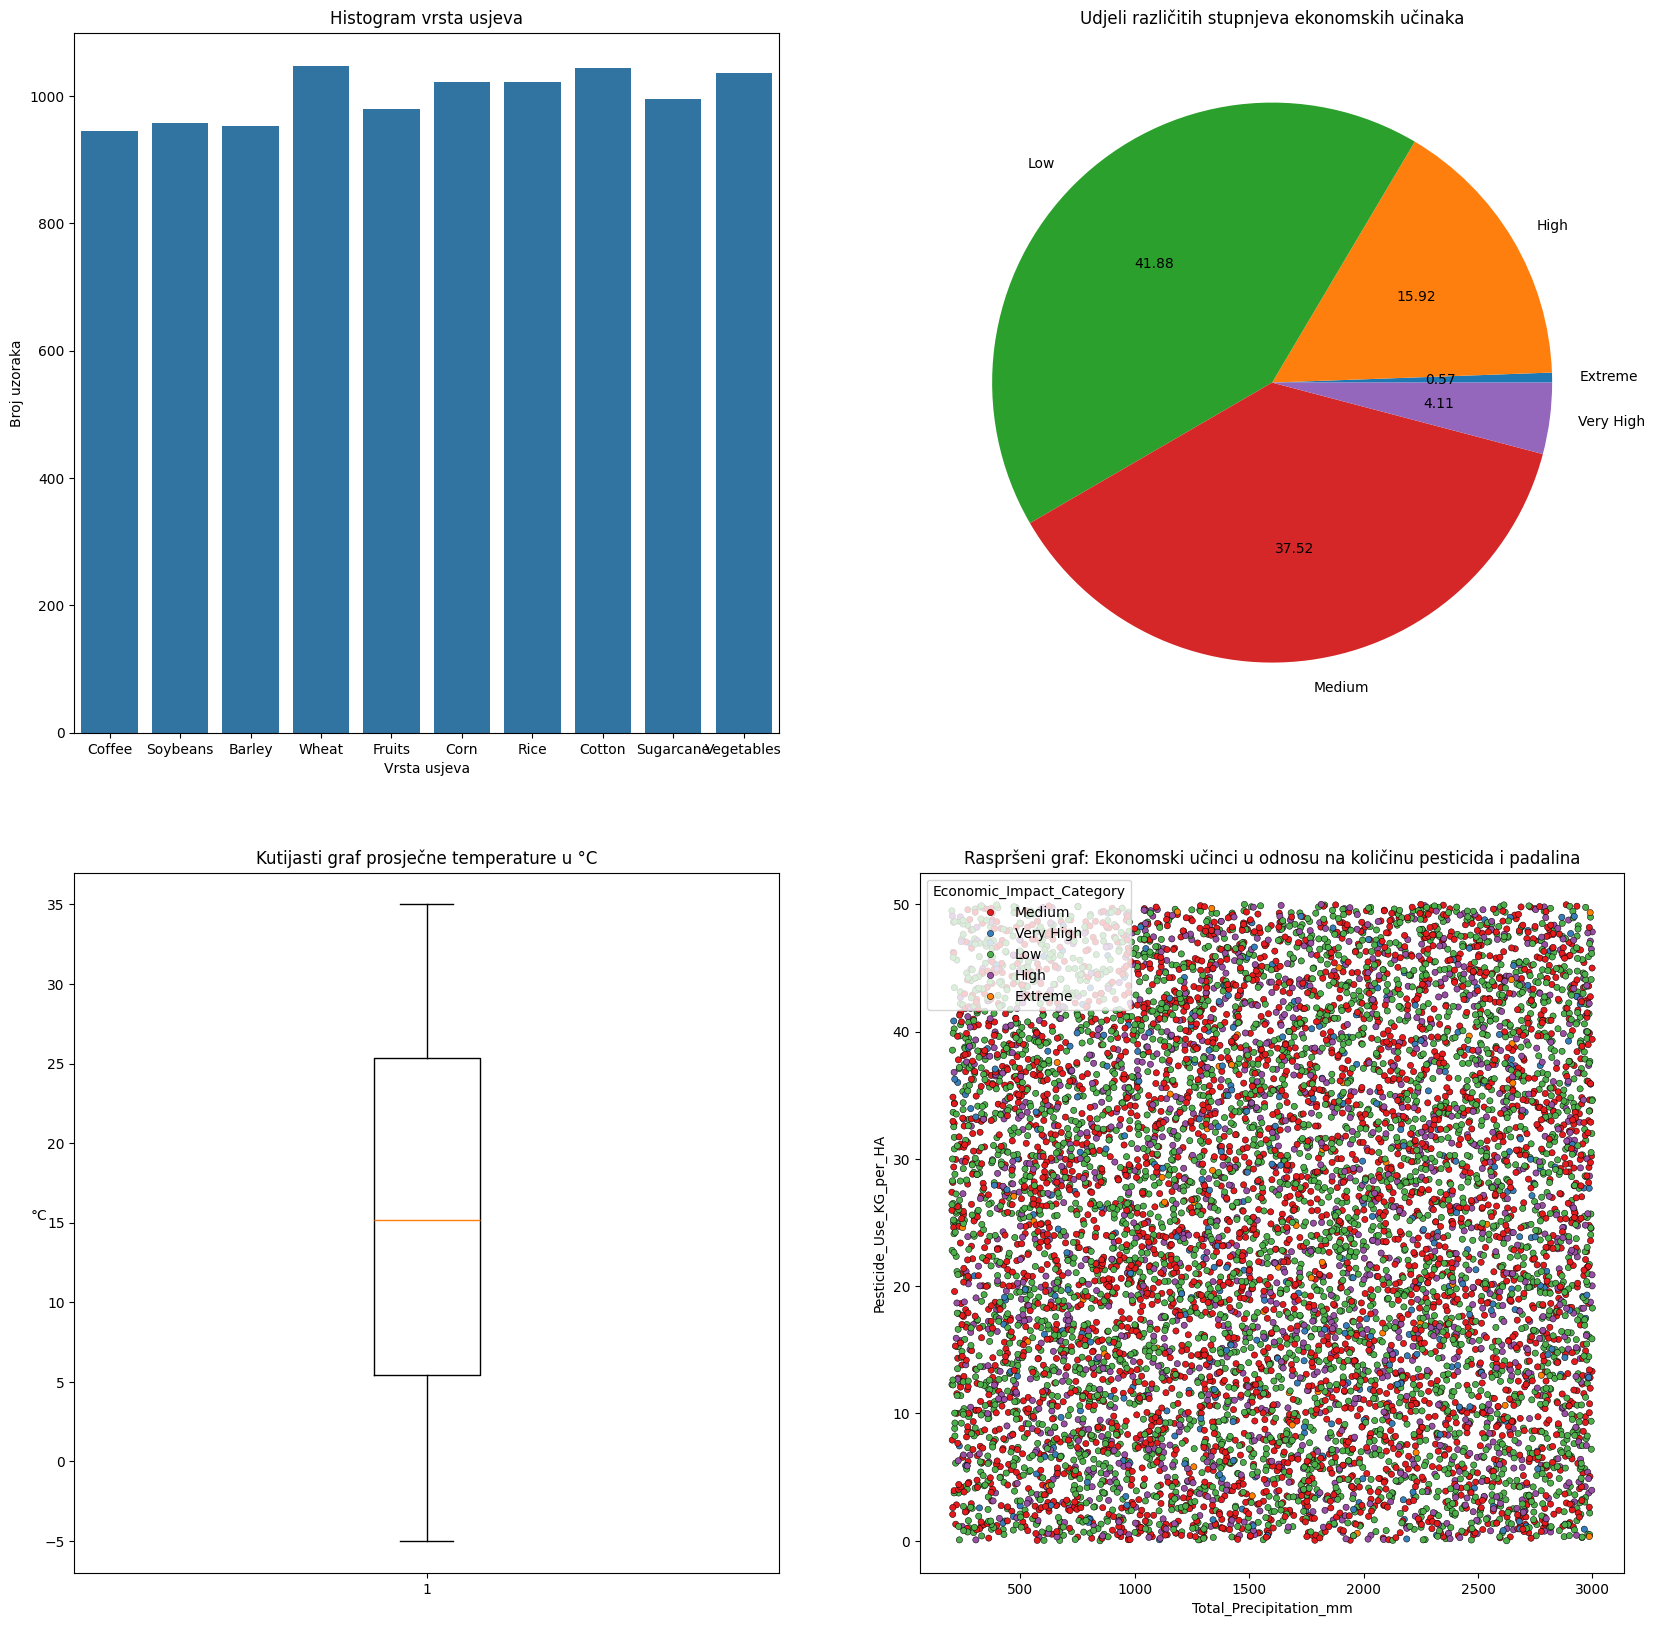

In [46]:
# KOD OVDJE
#Nakon što provedemo vizualizaciju koristeći dataframe, ukloniti ćemo kategoričke značajke koje su enkodirane nekom od metoda (naravno, samo originalne 
#stupce, nad kojima nije provedeno enkodiranje). Također, za prikazivanje kategoričke značajke nećemo koristiti enkodirane stupce, nego originalne, radi
#lakše preglednosti i čitljivosti grafova. Zbog toga nam je bolje ponovno učitati podatke u novi podatkovni okvir. 

dataframe_to_plot = pd.read_csv(DATA_PATH)
figures, axes = plt.subplots(2, 2, figsize=(20, 20))

#Histogram tipova usjeva (ne znam napamet točan prijevod riječi crop, nadam se da je ovo dobro)
sns.countplot(ax=axes[0, 0], x='Crop_Type', data=dataframe)
axes[0, 0].set_title('Histogram vrsta usjeva')
axes[0, 0].set_xlabel('Vrsta usjeva')
axes[0, 0].set_ylabel('Broj uzoraka')

#Pitni graf varijable Economic_Impact_Category
count_per_impact = dataframe_to_plot.groupby("Economic_Impact_Category").size().values
impact_name = dataframe_to_plot.groupby('Economic_Impact_Category').size().index.values
axes[0, 1].pie(count_per_impact, labels=impact_name, autopct='%.2f')
axes[0, 1].set_title("Udjeli različitih stupnjeva ekonomskih učinaka")

#Kutijasti graf varijable Average_Temperature_C 
axes[1, 0].boxplot(dataframe_to_plot[["Average_Temperature_C"]])
axes[1, 0].set_ylabel("°C", rotation=0)
axes[1, 0].set_title("Kutijasti graf prosječne temperature u °C")

#Raspršeni graf
sns.scatterplot(ax=axes[1, 1],
                x="Total_Precipitation_mm", 
                y="Pesticide_Use_KG_per_HA", 
                hue="Economic_Impact_Category",
                palette="Set1", 
                data=dataframe_to_plot, 
                s=20, edgecolor="black")
axes[1, 1].set_title('Raspršeni graf: Ekonomski učinci u odnosu na količinu pesticida i padalina')

plt.show()